In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

import os

from skimage import transform
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [0]:
dataset_path = ''

classes = glob(dataset_path+'/*')
num_classes = len(classes)

7


## Creating labels list

In [0]:
labels = np.array([], dtype=np.int)
for class_num in classes:
    class_num = class_num[-1]
    num_files = len(glob((dataset_path+'/%s/*.jp*g') % class_num))
    labels = np.append(labels, np.array([int(class_num)-1]*num_files))
one_hot_labels = np.eye(num_classes)[labels]

## Image files

In [0]:
image_files = glob(dataset_path+'/*/*.jp*g')

In [0]:
transformed_image_shape = (224, 224, 3)

In [0]:
images = np.empty((len(image_files), *transformed_image_shape))
for i in range(len(image_files)):
    img = plt.imread(image_files[i])
    transformed_img = transform.resize(img, transformed_image_shape[0:2], preserve_range=True)
    images[i] = transformed_img

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


## Normalizing image tensors

In [0]:
images /= 255.0

## Input, target, weights and bias initialization

In [0]:
x = tf.placeholder(tf.float32, (None, *transformed_image_shape))
y = tf.placeholder(tf.float32, (None, num_classes))

w1 = tf.Variable(tf.random_normal([3, 3, 3, 64]))
w2 = tf.Variable(tf.random_normal([3, 3, 64, 128]))
w3 = tf.Variable(tf.random_normal([3, 3, 128, 256]))

b1 = tf.Variable(tf.random_normal([64]))
b2 = tf.Variable(tf.random_normal([128]))
b3 = tf.Variable(tf.random_normal([256]))

Instructions for updating:
Colocations handled automatically by placer.


##  3 Convolution, Relu and Pooling block and 1 Fully connected block

In [0]:
conv_layer_1 = tf.nn.conv2d(x, w1, [1, 2, 2, 1], 'VALID') + b1
relu_layer_1 = tf.nn.relu(conv_layer_1)
maxpool_layer_1 = tf.nn.max_pool(relu_layer_1, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')

conv_layer_2 = tf.nn.conv2d(maxpool_layer_1, w2, [1, 2, 2, 1], 'VALID') + b2
relu_layer_2 = tf.nn.relu(conv_layer_2)
maxpool_layer_2 = tf.nn.max_pool(relu_layer_2, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')

conv_layer_3 = tf.nn.conv2d(maxpool_layer_2, w3, [1, 2, 2, 1], 'VALID') + b3
relu_layer_3 = tf.nn.relu(conv_layer_3)
maxpool_layer_3 = tf.nn.max_pool(relu_layer_3, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')

flatten_layer = tf.layers.Flatten()(maxpool_layer_3)

o = tf.layers.Dense(num_classes)(flatten_layer)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(y, o))

optimizer = tf.train.AdamOptimizer(learning_rate=0.003)
train = optimizer.minimize(loss)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(o,1))
acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
init = tf.global_variables_initializer()

## Setting Epoch and Batch Size

In [0]:
epochs = 200
batch_size = 64

## Shuffling dataset

In [0]:
random_indexes = np.random.randint(0, len(image_files), (len(image_files)))

In [0]:
images = images[random_indexes]

## Splitting dataset into train and test set

In [0]:
x_train, x_test, y_train, y_test = train_test_split(images, one_hot_labels, test_size=0.25)

In [0]:
del images
del labels
del image_files

In [0]:
sess = tf.InteractiveSession()

## Training

In [0]:
train_loss = []
train_accuracy = []
sess.run(init)
for i in range(epochs):
    for batch in range(len(x_train)//batch_size):
        batch_x = x_train[batch*batch_size:min((batch+1)*batch_size,len(x_train))]
        batch_y = y_train[batch*batch_size:min((batch+1)*batch_size,len(y_train))]
        _ = sess.run(train, feed_dict={x:batch_x,y:batch_y})
        loss_, accuracy = sess.run([loss, acc], feed_dict={x: batch_x,y: batch_y})
    print('epoch '+str(i+1)+', Loss '+'{:.6f}'.format(loss_)+', Training Accuracy '+'{:.5f}'.format(accuracy))
    train_loss.append(loss_)
    train_accuracy.append(accuracy)

epoch 1, Loss 33030.523438, Training Accuracy 0.17188
epoch 2, Loss 5595.480469, Training Accuracy 0.21875
epoch 3, Loss 423.455261, Training Accuracy 0.28125
epoch 4, Loss 63.865585, Training Accuracy 0.48438
epoch 5, Loss 14.791290, Training Accuracy 0.59375
epoch 6, Loss 17.032082, Training Accuracy 0.59375
epoch 7, Loss 5.053983, Training Accuracy 0.68750
epoch 8, Loss 5.396164, Training Accuracy 0.64062
epoch 9, Loss 3.287899, Training Accuracy 0.57812
epoch 10, Loss 2.790369, Training Accuracy 0.65625
epoch 11, Loss 1.532777, Training Accuracy 0.78125
epoch 12, Loss 2.652078, Training Accuracy 0.68750
epoch 13, Loss 1.260803, Training Accuracy 0.73438
epoch 14, Loss 1.467253, Training Accuracy 0.75000
epoch 15, Loss 3.042482, Training Accuracy 0.71875
epoch 16, Loss 1.374426, Training Accuracy 0.78125
epoch 17, Loss 2.222987, Training Accuracy 0.68750
epoch 18, Loss 1.772129, Training Accuracy 0.75000
epoch 19, Loss 2.698127, Training Accuracy 0.70312
epoch 20, Loss 1.010124, Tra

## Plotting the loss and accuracy for training data

Text(0.5, 1.0, 'Training Data')

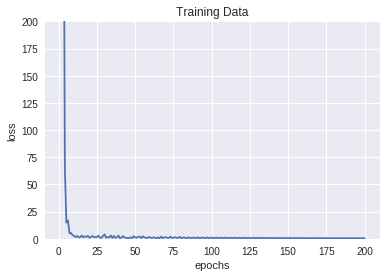

In [0]:
X = np.arange(1, epochs+1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.ylim((0, 200.0))
plt.plot(X, train_loss)
plt.title('Training Data')

Text(0.5, 1.0, 'Training Data')

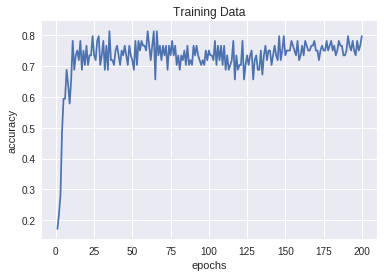

In [0]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(X, train_accuracy)
plt.title('Training Data')

## Test data loss and accuracy

In [0]:
test_loss, test_accuracy = sess.run([loss, acc], feed_dict={x:x_test[:], y:y_test[:]})

In [0]:
print('Test loss: %f accuracy: %f' % (test_loss, test_accuracy))

Test loss: 13.583310 accuracy: 0.131579


In [0]:
sess.close()